# Machine Learning and Deep Mining Spam Email Detection Project

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

In [104]:
df = pd.read_csv("spam_nospam.csv", header=None)
df[:]

,0,1,2
0,CATEGORY,MESSAGE,FILE_NAME
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
2,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
3,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


## Dataset information and statistics

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5797 non-null   object
 1   1       5797 non-null   object
 2   2       5797 non-null   object
dtypes: object(3)
memory usage: 136.0+ KB


In [106]:
df.describe()

,0,1,2
count,5797,5797,5797
unique,3,5626,5797
top,0,\n\nHello I am your hot lil horny toy.\n\n ...,FILE_NAME
freq,3900,7,1


In [107]:
df.shape

(5797, 3)

In [108]:
df.dtypes

0    object
1    object
2    object
dtype: object

In [109]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [110]:
df = df.rename(columns={0:"Type", 1:"Message", 2:"Filename"})
df = df.drop(0)
df[:]

,Type,Message,Filename
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
2,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
3,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
5,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [112]:
df["Length"] = df["Message"].apply(len)
df[:]

,Type,Message,Filename,Length
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a,612
2,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510,1298
3,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216,6691
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978,1141
5,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6,1795
...,...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97,953
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f,257
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8,393
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0,1434


<Axes: xlabel='Type', ylabel='count'>

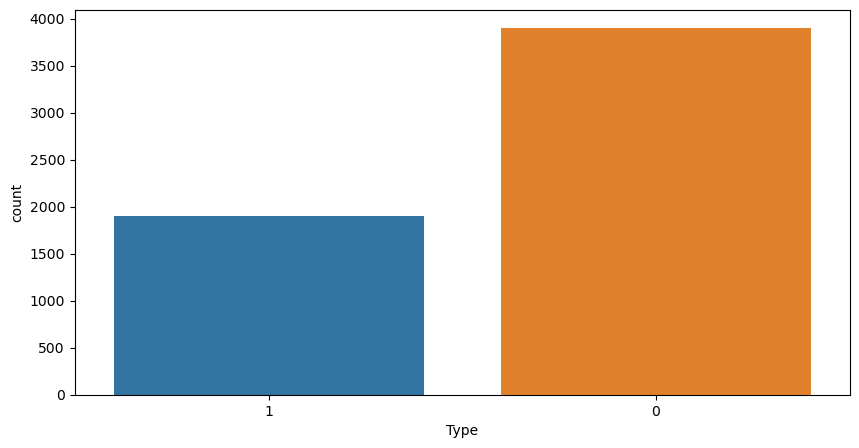

In [113]:
plt.figure(figsize = (10, 5))
x = df.Type.value_counts()
sns.countplot(x = "Type", data = df)

## Most common words without wordcloud

In [115]:
non_spam = df[df.Type == 0]
spam = df[df.Type == 1]

non_spam_text = " ".join(non_spam.Message.to_numpy().tolist())
spam_text = " ".join(spam.Message.to_numpy().tolist())

non_spam_amount = []
spam_amount = []
counter = 0

for i in df["Type"]:
    if (i == "0"):
        non_spam_amount.append(df["Message"].iloc[counter])
    elif (i == "1"):
        spam_amount.append(df["Message"].iloc[counter])
    counter = counter + 1

In [116]:
word_array_nonspam = []

for i in non_spam_amount:
    for sub in i.split():
        if (sub == "-" or sub == "/" or sub == "." or sub == "," or sub == ":" or sub == "@" or sub == "'" or len(sub) < 5):
            continue
        else:
            word_array_nonspam.append(sub)
        
word_set_nonspam = Counter(word_array_nonspam)
frequent_words_1 =word_set_nonspam.most_common(10)
print(frequent_words_1)

[('about', 1867), ('would', 1837), ('which', 1762), ('their', 1501), ('wrote:', 1434), ('mailing', 1415), ('other', 1366), ('there', 1300), ("don't", 1281), ('_______________________________________________', 1270)]


In [122]:
word_array_spam = []

for i in spam_amount:
    for sub in i.split():
        if (sub == "-" or sub == "/" or sub == "." or sub == "," or sub == ":" or sub == "@" or sub == "'" or len(sub) < 5):
            continue
        else:
            word_array_spam.append(sub)
        
word_set_spam = Counter(word_array_spam)
frequent_words_2 = word_set_spam.most_common(10)
print(frequent_words_2)

[('</tr>', 3994), ('Helvetica,', 2939), ('<font', 2780), ('</td>', 2362), ('sans-serif"', 1836), ('email', 1805), ('<table', 1792), ('</table>', 1628), ('Arial,', 1578), ('<tr>=20', 1413)]


## Most common words with wordcloud

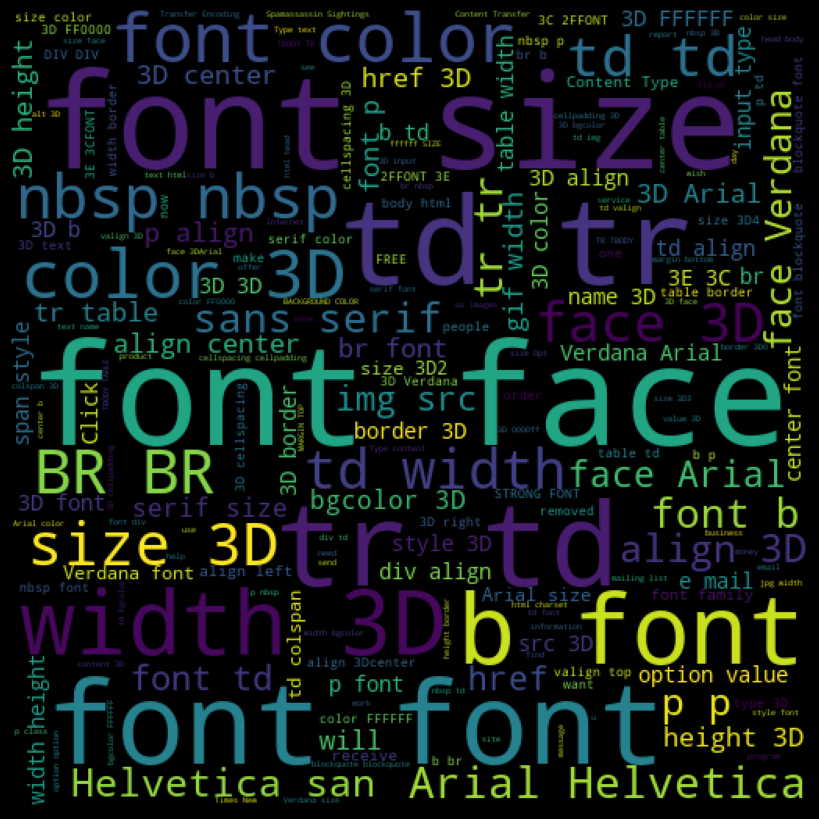

In [120]:
spam_words = " ".join(list(df[df["Type"] == "1"]["Message"]))
spam_wordcloud = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

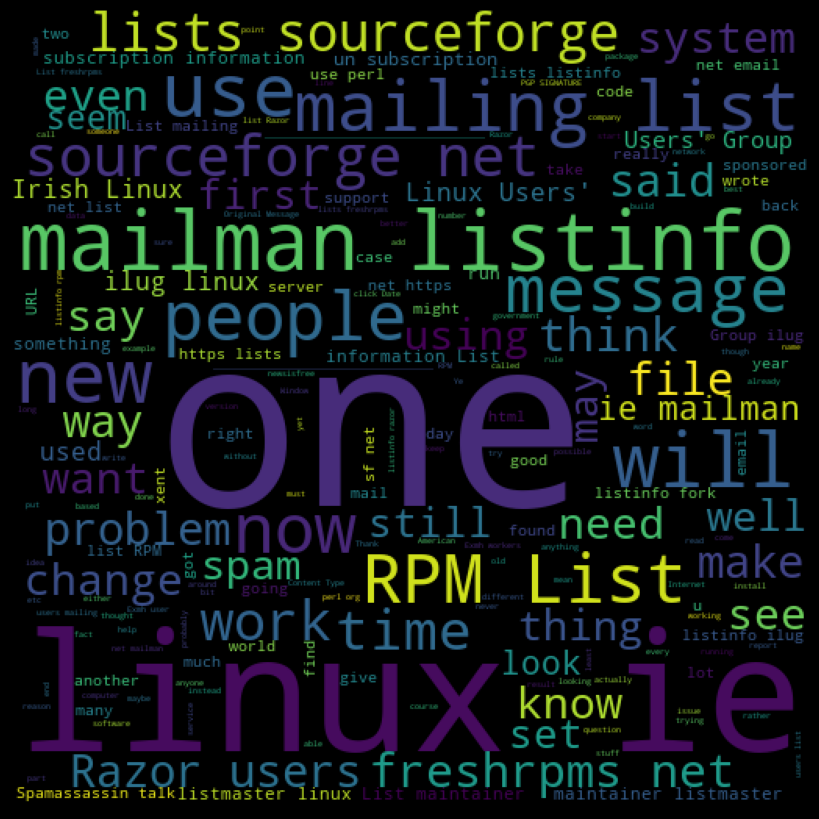

In [119]:
non_spam_words = " ".join(list(df[df["Type"] == "0"]["Message"]))
non_spam_wordcloud = WordCloud(width = 512, height = 512).generate(non_spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(non_spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()